# Name Surname:

# Date: 3/20/2023

# Quiz 4: Classification

# Task Description: Your goal is to create at least 4 graphs analyzing nba_logreg.csv dataset. Description of variables is attached as metadata.png

# After visualization create appropriate model for target_5yrs variable

In [14]:
import numpy as np
import pandas as pd


from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('nba_logreg.csv')
data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
data.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [4]:
data.describe() # no na's


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
data["TARGET_5Yrs"].value_counts() # binary values-lg regression model can be helpful!

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.linear_model import LogisticRegression

In [17]:
Logistic = LogisticRegression(random_state=42)

In [18]:

data.drop(columns =["Name"],inplace=True)


In [19]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV          1340 non-null   float64
 19  TARGET

In [20]:
data.dropna(axis=0,inplace=True)
y = data['TARGET_5Yrs'].astype(int)
X = data.drop(columns='TARGET_5Yrs')
X.head()
y.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1329 non-null   int64  
 1   MIN          1329 non-null   float64
 2   PTS          1329 non-null   float64
 3   FGM          1329 non-null   float64
 4   FGA          1329 non-null   float64
 5   FG%          1329 non-null   float64
 6   3P Made      1329 non-null   float64
 7   3PA          1329 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1329 non-null   float64
 10  FTA          1329 non-null   float64
 11  FT%          1329 non-null   float64
 12  OREB         1329 non-null   float64
 13  DREB         1329 non-null   float64
 14  REB          1329 non-null   float64
 15  AST          1329 non-null   float64
 16  STL          1329 non-null   float64
 17  BLK          1329 non-null   float64
 18  TOV          1329 non-null   float64
 19  TARGET

In [21]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.25,random_state=42)
print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 996
 Test set: 333


In [22]:
data.columns
train_x.columns


Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [23]:
Logistic.fit(train_x,train_y)
test_y_new = Logistic.predict(test_x)    
# train_y_new = Logistic.predict(train_x)
# acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
# rec_train = recall_score(train_y, train_y_new)
rec_test = recall_score(test_y,test_y_new)
# pr_train = precision_score(train_y, train_y_new)
pr_test = precision_score(test_y,test_y_new)



In [24]:
l= [acc_test,rec_test,pr_test]

In [25]:
print(l)

[0.7147147147147147, 0.8093023255813954, 0.7631578947368421]


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

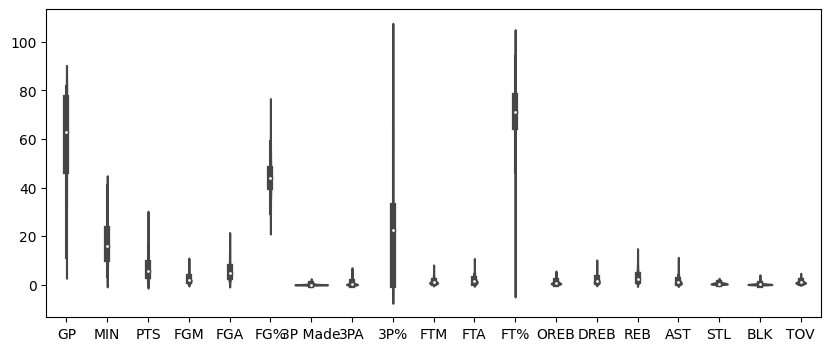

In [33]:
plt.figure(figsize=(10,4)) 
sns.violinplot(data.loc[:, data.columns != 'TARGET_5Yrs'])
plt.show()

<AxesSubplot: xlabel='MIN', ylabel='FGM'>

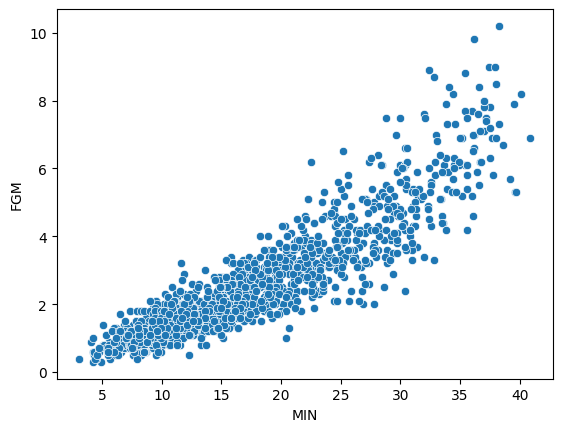

In [34]:
sns.scatterplot(data.loc[:, data.columns != 'TARGET_5Yrs'], x="MIN",y="FGM") #AS THE time in mins spent on the field increases the #of golas hit increases

<AxesSubplot: xlabel='TARGET_5Yrs', ylabel='FGM'>

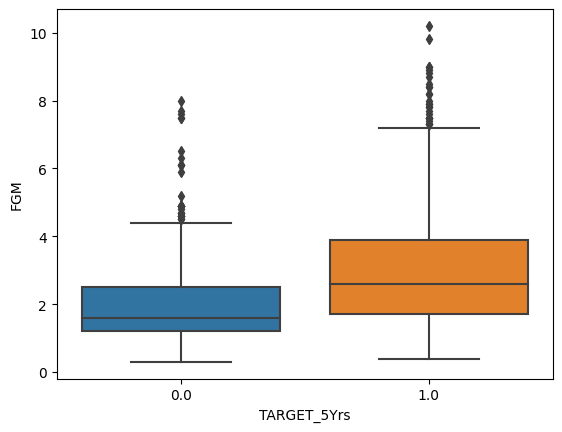

In [35]:
sns.boxplot(data,x= "TARGET_5Yrs",y="FGM") #AS career is more than 5 yrs, the #of goals are higher(more outliers above)
# and the median is higher, the Q3-A1 is on a higher acel than for target5yrs=0, which means the 50%of players in target5yrs=1 beat more goals 

<AxesSubplot: xlabel='FT%', ylabel='AST'>

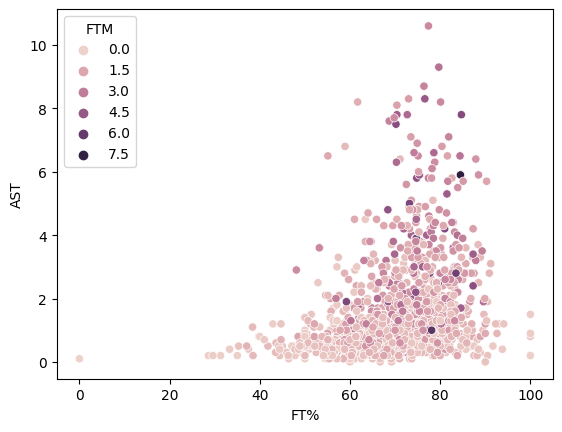

In [44]:
sns.scatterplot(data=data, x= "FT%",y="AST",hue="FTM") #no clear pattern but sometimes when the 
# free throw percetn grows the FTM is higher, the higher the free throw percetn the more assists the players make

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
Knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
std_scaler = StandardScaler()
train_x = std_scaler.fit_transform(train_x)

In [49]:
test_x = std_scaler.transform(test_x)

In [60]:
print(test_x)
Knn.fit(train_x, train_y)
test_y_new = Knn.predict(test_x)
acc_test = accuracy_score(test_y, test_y_new)
rec_test = recall_score(test_y, test_y_new)
pr_test = precision_score(test_y, test_y_new)
li=[acc_test,rec_test,pr_test]

[[ 1.23992173 -0.10266029 -0.29614394 ... -0.53993226  0.50806831
  -0.56353063]
 [-0.54503833 -1.34176115 -0.99212051 ... -1.01520626 -0.17026418
  -0.97212794]
 [ 1.23992173  2.11342394  2.68982008 ... -0.06465826  2.54306576
   2.43284965]
 ...
 [ 0.14591395  0.19520049  0.10797149 ...  0.17297874  0.73417913
  -0.15493332]
 [-0.37230026 -1.17495911 -0.83496451 ... -0.77756926 -0.62248583
  -1.10832704]
 [-2.27241904 -1.54430649 -1.39623595 ... -1.25284326 -0.17026418
  -1.51692435]]


AttributeError: 'NoneType' object has no attribute 'split'